In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
X = tf.placeholder(tf.float32, [None, 28*28])
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))


In [4]:
init = tf.global_variables_initializer()

In [5]:
# Model
Y = tf.nn.softmax( tf.matmul(X, W) + b )
# Ground truth
Y_ = tf.placeholder(tf.float32, [None, 10])

In [6]:
# Loss function
cost = -tf.reduce_sum(Y_ * tf.log(Y))

In [7]:
# Nb of correct answers in batch
is_correct = tf.equal( tf.argmax(Y_, 1), tf.argmax(Y, 1) )
accuracy = tf.reduce_mean( tf.cast(is_correct, tf.float32))

In [8]:
# Training - set training method
optimizer = tf.train.GradientDescentOptimizer(0.003)
# Training - make a step
train_step = optimizer.minimize(cost)

In [9]:
# Load data
import utils.RBrown_input_data as rbm
dt_path = '/Users/younes_zerouali/Documents/Stradigi/Databases/MNIST' 
mnist = rbm.read_data_sets(dt_path, one_hot=True)

Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/younes_zerouali/Documents/Stradigi/Databases/MNIST/t10k-labels-idx1-ubyte.gz


In [10]:
# Get a batch
batch = mnist.train.next_batch(100)

Ground truth is 6


(100, 784)

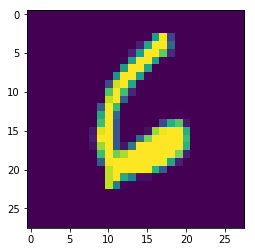

In [11]:
# Visualize data
imgId= 3
img0 = batch[0][imgId,:]
# Display first image
plt.imshow(np.reshape(img0, [28,28]))
print('Ground truth is %i' %np.argmax(batch[1][imgId]))

np.shape(batch[0])



In [12]:
sess = tf.Session()
sess.run(init)

In [13]:
# Loop and train/test
for i in range(10000):
    # Get a batch
    batchX, batchY = mnist.train.next_batch(100)
    # TRAIN: make training dictionary
    trdict = {X:batchX, Y_:batchY}
    # TRAIN: update weigths
    sess.run(train_step, feed_dict=trdict)
    # TRAIN: accuracy
    a,c = sess.run([accuracy, cost], feed_dict=trdict)
        
    # TEST
    testX, testY = mnist.test.next_batch(100)
    tsdict = {X:testX, Y_:testY}
    a,c = sess.run([accuracy, cost], feed_dict=tsdict)
    if i%99==0: print('Accuracy at iteration %i: %f' %(i, a) )
        

Accuracy at iteration 0: 0.400000
Accuracy at iteration 99: 0.850000
Accuracy at iteration 198: 0.920000
Accuracy at iteration 297: 0.930000
Accuracy at iteration 396: 0.890000
Accuracy at iteration 495: 0.910000
Accuracy at iteration 594: 0.950000
Accuracy at iteration 693: 0.930000
Accuracy at iteration 792: 0.880000
Accuracy at iteration 891: 0.900000
Accuracy at iteration 990: 0.930000
Accuracy at iteration 1089: 0.960000
Accuracy at iteration 1188: 0.920000
Accuracy at iteration 1287: 0.930000
Accuracy at iteration 1386: 0.930000
Accuracy at iteration 1485: 0.960000
Accuracy at iteration 1584: 0.920000
Accuracy at iteration 1683: 0.910000
Accuracy at iteration 1782: 0.950000
Accuracy at iteration 1881: 0.920000
Accuracy at iteration 1980: 0.930000
Accuracy at iteration 2079: 0.960000
Accuracy at iteration 2178: 0.930000
Accuracy at iteration 2277: 0.900000
Accuracy at iteration 2376: 0.900000
Accuracy at iteration 2475: 0.920000
Accuracy at iteration 2574: 0.960000
Accuracy at ite

In [149]:
testX, testY = mnist.test.next_batch(100)
print(testX.shape)
print(testY.shape)


(100, 784)
(100, 10)


In [101]:
    # Make training dictionary
    trdict = {X:batchX, Y:batchY}
    
    # Training step
    sess.run(train_step, feed_dict=trdict)
    
    # Accuracy, cross-entropy: on taining data
    a,c = sess.run([accuracy, cost], feed=trdict)
    
    # Test
    tsdict = {X:mnist.testX, Y_:mnist.testY}
    a,c = sess.run([accuracy, cost], feed=tsdict)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_5' with dtype float and shape [?,10]
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_5', defined at:
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-0613b5b7f1f6>", line 4, in <module>
    Y_ = tf.placeholder(tf.float32, [None, 10])
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/younes_zerouali/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_5' with dtype float and shape [?,10]
	 [[Node: Placeholder_5 = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
